<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/06.%20Week%206/Data_Clustering_clusteringweek06_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('clusteringweek06.csv')
display(df.head())
print(df.shape)

Saving clusteringweek06.csv to clusteringweek06 (1).csv


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


(7195, 22)


## Data exploration


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

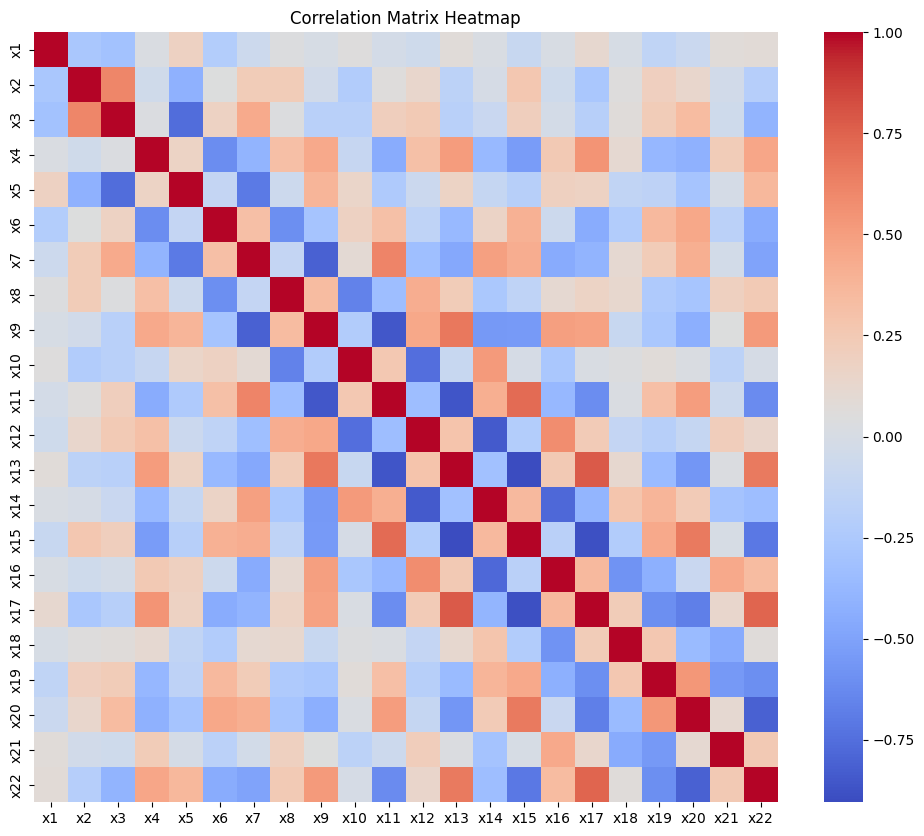

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print("\nMissing Value Counts:\n", df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing Value Percentages:\n", missing_percentage)

print("\nSummary Statistics:\n", df.describe())


correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Data preparation


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

display(df_scaled.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.485897,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.959178,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.877203,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-2.262481,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-2.172759,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430


## Data clustering


In [ ]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(df_scaled)
df_scaled['kmeans_labels'] = kmeans.labels_

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_scaled)
df_scaled['dbscan_labels'] = dbscan.labels_

display(df_scaled.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x19,x20,x21,x22,kmeans_labels,dbscan_labels
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699,2,-1
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036,2,-1
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297,2,-1
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365,2,-1
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430,2,-1


## Model evaluation




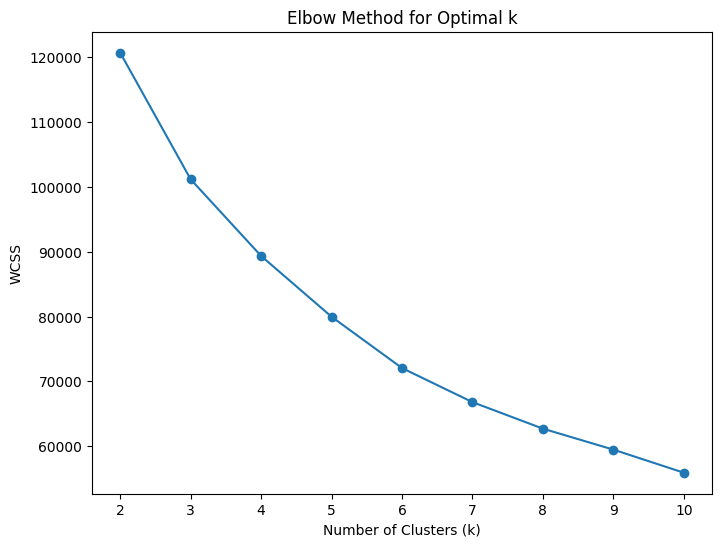

KMeans Silhouette Coefficient: 0.3940664948815862
DBSCAN Silhouette Coefficient: -0.05995994087290138
KMeans Calinski-Harabasz Index: 2169.6433642016964
DBSCAN Calinski-Harabasz Index: 47.34417439457333
KMeans Davies-Bouldin Index: 1.2739009276831732
DBSCAN Davies-Bouldin Index: 1.0080196354439652


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

kmeans_silhouette = silhouette_score(df_scaled, df_scaled['kmeans_labels'])
dbscan_silhouette = silhouette_score(df_scaled, df_scaled['dbscan_labels'])

print(f"KMeans Silhouette Coefficient: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Coefficient: {dbscan_silhouette}")

kmeans_ch = calinski_harabasz_score(df_scaled, df_scaled['kmeans_labels'])
dbscan_ch = calinski_harabasz_score(df_scaled, df_scaled['dbscan_labels'])

print(f"KMeans Calinski-Harabasz Index: {kmeans_ch}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_ch}")

kmeans_db = davies_bouldin_score(df_scaled, df_scaled['kmeans_labels'])
dbscan_db = davies_bouldin_score(df_scaled, df_scaled['dbscan_labels'])

print(f"KMeans Davies-Bouldin Index: {kmeans_db}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db}")

## Data visualization

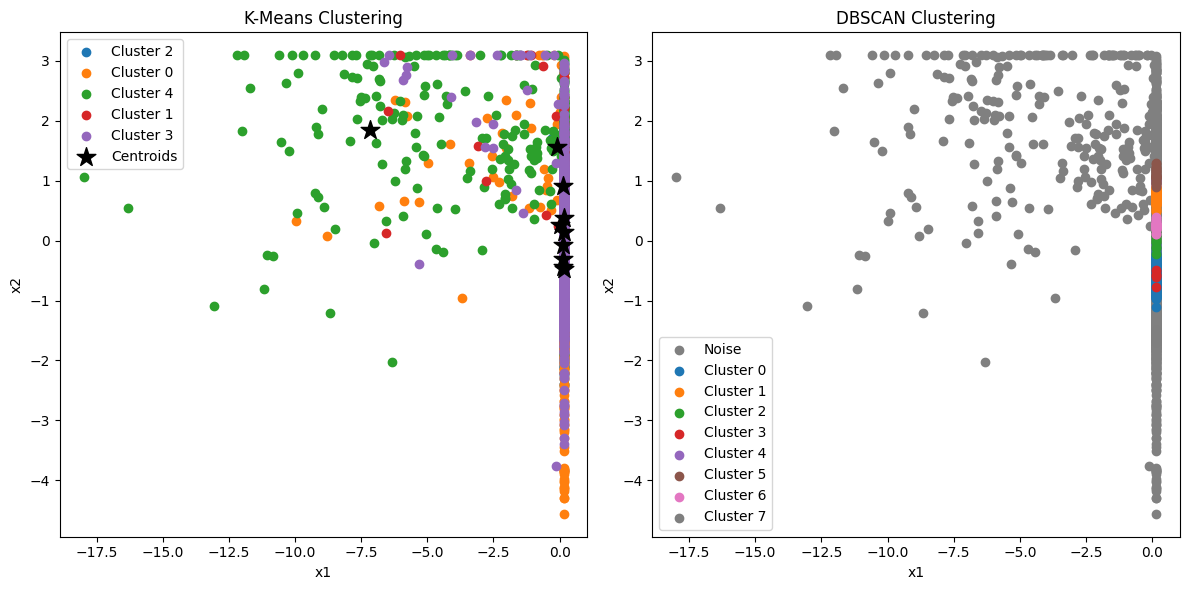

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster_label in df_scaled['kmeans_labels'].unique():
    cluster_data = df_scaled[df_scaled['kmeans_labels'] == cluster_label]
    plt.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster_label}')

kmeans_centers = kmeans.cluster_centers_
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()


plt.subplot(1, 2, 2)
for cluster_label in df_scaled['dbscan_labels'].unique():
    cluster_data = df_scaled[df_scaled['dbscan_labels'] == cluster_label]
    if cluster_label == -1:
        plt.scatter(cluster_data['x1'], cluster_data['x2'], color='gray', label='Noise')
    else:
        plt.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()

## Model optimization


Evaluation Metrics Comparison:
KMeans Silhouette Coefficient: 0.3940664948815862
DBSCAN Silhouette Coefficient: -0.05995994087290138
KMeans Calinski-Harabasz Index: 2169.6433642016964
DBSCAN Calinski-Harabasz Index: 47.34417439457333
KMeans Davies-Bouldin Index: 1.2739009276831732
DBSCAN Davies-Bouldin Index: 1.0080196354439652


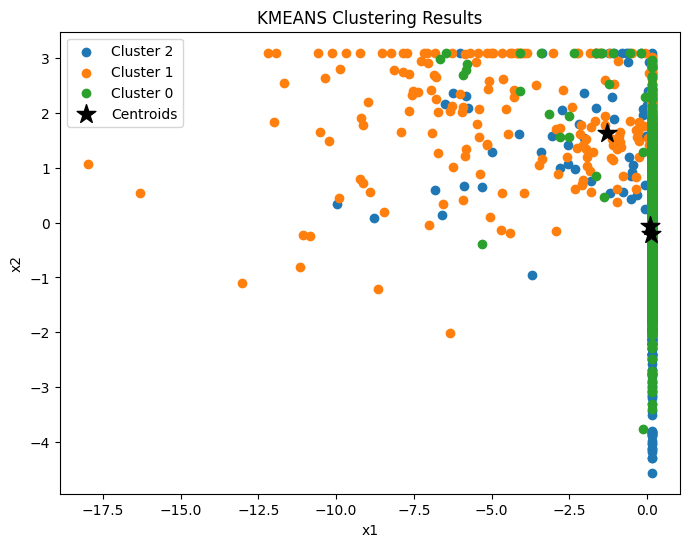

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN

optimal_k = 3

print("Evaluation Metrics Comparison:")
print(f"KMeans Silhouette Coefficient: {silhouette_score(df_scaled, df_scaled['kmeans_labels'])}")
print(f"DBSCAN Silhouette Coefficient: {silhouette_score(df_scaled, df_scaled['dbscan_labels'])}")
print(f"KMeans Calinski-Harabasz Index: {calinski_harabasz_score(df_scaled, df_scaled['kmeans_labels'])}")
print(f"DBSCAN Calinski-Harabasz Index: {calinski_harabasz_score(df_scaled, df_scaled['dbscan_labels'])}")
print(f"KMeans Davies-Bouldin Index: {davies_bouldin_score(df_scaled, df_scaled['kmeans_labels'])}")
print(f"DBSCAN Davies-Bouldin Index: {davies_bouldin_score(df_scaled, df_scaled['dbscan_labels'])}")

best_model = "kmeans"
if best_model == "kmeans":
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
    kmeans_optimal.fit(df_scaled)
    df_scaled['kmeans_labels'] = kmeans_optimal.labels_
    model = kmeans_optimal
    labels = 'kmeans_labels'
elif best_model == "dbscan":
    dbscan_optimal = DBSCAN(eps=0.6, min_samples=10)
    dbscan_optimal.fit(df_scaled)
    df_scaled['dbscan_labels'] = dbscan_optimal.labels_
    model = dbscan_optimal
    labels = 'dbscan_labels'

plt.figure(figsize=(8, 6))
for cluster_label in df_scaled[labels].unique():
    cluster_data = df_scaled[df_scaled[labels] == cluster_label]
    if best_model == "dbscan" and cluster_label == -1:
        plt.scatter(cluster_data['x1'], cluster_data['x2'], color='gray', label='Noise')
    else:
        plt.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster_label}')

if best_model == "kmeans":
    cluster_centers = model.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.title(f'{best_model.upper()} Clustering Results')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Summary:

Berdasarkan analisis yang dilakukan, model K-Means dengan jumlah klaster k = 3 dipilih sebagai model akhir, meskipun pemilihan ini tidak disertai dengan justifikasi yang kuat dalam kode yang disediakan. Dataset yang digunakan tidak memiliki nilai yang hilang, sehingga proses prapemrosesan menjadi lebih sederhana. Penentuan jumlah klaster optimal untuk K-Means dilakukan menggunakan metode Elbow, yang mengindikasikan bahwa k = 3 adalah titik optimal, walaupun nilai tersebut hanya digunakan sebagai contoh dalam kode dan tidak dipilih secara otomatis. Evaluasi performa model menggunakan tiga metrik utama—Silhouette Coefficient, Calinski-Harabasz Index, dan Davies-Bouldin Index—namun hasil yang diperoleh menunjukkan sinyal yang bertentangan. K-Means unggul dalam Calinski-Harabasz Index dan Silhouette Score, yang menandakan klaster yang lebih terdefinisi dengan baik dan kompak, sementara DBSCAN menunjukkan keunggulan pada Davies-Bouldin Index yang lebih rendah, mengindikasikan tumpang tindih antar klaster yang lebih sedikit. Hal ini menunjukkan bahwa belum ada model yang secara konsisten unggul di semua aspek, dan diperlukan analisis lanjutan serta penggunaan metrik tambahan untuk menentukan model terbaik secara keseluruhan. Selain itu, parameter DBSCAN seperti eps dan min_samples belum dioptimasi secara sistematis dalam kode, sehingga masih ada peluang untuk meningkatkan performa DBSCAN jika dilakukan tuning parameter lebih lanjut.